In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
lin_kern = np.dot

def give_gaus_kern(s):
    def gaus_kern(x1,x2):
        return np.e**((-np.linalg.norm(x1-x2)**2)/(2*(5.2278**2)))
    return gaus_kern

In [3]:
def generate_gaussian_data(dim, n_points):
    def inside_circle(point, center, r):
        return np.linalg.norm(point - center) <= r
    
    points = [[random.random()*10 for _ in range(dim)] for _ in range(n_points)]
    labels = []
    for point in points:
        if inside_circle(np.array(point), np.array([5 for _ in range(dim)]), 2) and random.random() < 0.99:
            labels.append(1)
        else:
            if random.random() < 0.99:
                labels.append(0)
            else:
                labels.append(1)           
                
    d = {str(i):[] for i in range(dim)}
    
    d[str(dim)] = [1 for _ in range(n_points)] # ones

    d["label"] = []
    for (point, l) in zip(points, labels):        
        for i in range(len(point)):
            d[str(i)].append(point[i])
        d["label"].append(l)
        
    df = pd.DataFrame.from_dict(d)

    X = df[[str(i) for i in range(dim+1)]].as_matrix()

    y = np.array(df["label"])

    return X, y, df

# plt.scatter(X[:,1],X[:,2], c=y)
# plt.scatter(X[:,0],X[:,1], c=y)

In [67]:
def generate_linear_data(dim):    
    points = [[random.random()*10 for _ in range(dim)] for _ in range(200)]
    labels = []
    coeffs = [random.randint(0,10) for _ in range(dim)]

    for [x,y] in points:
        if y-2*x > 1:
            labels.append(1)
        else:
            labels.append(0)
        
        
        
#     for point in points:
#         running_sum = 0
#         for i in range(len(point)):
#             running_sum += coeffs[i]*point[i]
#         if running_sum > 4743.96:
#             labels.append(1)
#         else: 
#             labels.append(0)

    d = {str(i):[] for i in range(dim)}
    d["label"] = []
    coeffs = [random.randint(0,10) for _ in range(dim)]
    for (point, l) in zip(points, labels):
        for i in range(len(point)):
            d[str(i)].append(point[i])
        d["label"].append(l)
        
    d["ones"] = [1 for _ in range(len(d["1"]))]
    df = pd.DataFrame.from_dict(d)
    X = df[["ones"] + [str(i) for i in range(dim)]].as_matrix()
    y = np.array(df["label"])
    return X, y, df

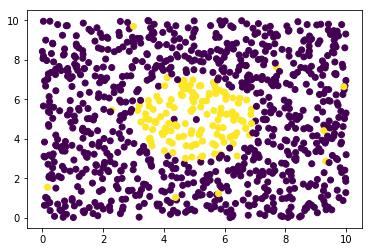

In [133]:
n_points = 1000
X, y, df_tr = generate_gaussian_data(2, n_points)
Xte, yte, df_te = generate_gaussian_data(2, n_points)

plt.scatter(X[:,0],X[:,1], c=y)
# plt.scatter(Xte[:,0],Xte[:,1], c=yte)

In [130]:
# df_tr.to_csv("gaus_2D_train.csv")
# df_te.to_csv("gaus_2D_test.csv")

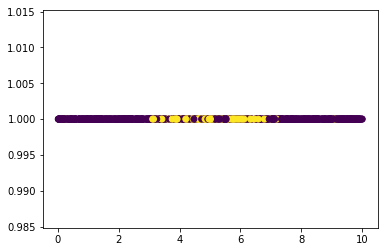

In [131]:
# X, y, df_tr = generate_linear_data(2)
# Xte, yte, df_te = generate_linear_data(2)

plt.scatter(X[:,0],X[:,1], c=y)
# plt.scatter(Xte[:,0],Xte[:,1], c=yte)

# start 3

In [341]:
f = np.zeros((10,10))
inds = [True for i in range(10) if i in X]
# inds[4] = False
f[inds]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [358]:
def fit_minibatch(X, y, lamb, n_epochs, batch_size=300, gamma=0.01, epsilon=0.01, kern="gaus"):
    n = X.shape[0]
    if kern == "gaus":
        s = get_sigma(X)
        k = give_gaus_kern(s)
        
    elif kern == "lin":
        k = lin_kern

    K = create_kernel_matrix(k, X)
        
    # gradient descent
    c = np.zeros(n)
    objs = [None for _ in range(n_epochs)]
    epochs_used = n_epochs
    
    times = np.zeros(n_epochs)
    start = time.time()
    for epoch in range(n_epochs):
        inds = sorted(np.random.permutation(n))
        new_k = K[[True for i in range(n) if i in inds]]
        c[inds] = c[inds] + gamma*(y[inds] - sigmoid_array(np.dot(new_k, c)) + 2*lamb*c[inds])
                         
        objs[epoch] = -sum(np.log(sigmoid_array(np.multiply(y, np.dot(K,c)))))
        times[epoch] = time.time() - start
    
    def predictor(x):
        s = 0
        for i in range(n):
            s += k(X[i],x)*c[i]

        return 1.0 / (1 + np.e**(-s))
    
    return predictor, c, objs, times


In [359]:
import time

In [360]:
def fit(X, y, lamb, n_epochs, gamma=0.01, epsilon=0.01, kern="gaus"):
    n = X.shape[0]
    if kern == "gaus":
        s = get_sigma(X)
        k = give_gaus_kern(s)
        
    elif kern == "lin":
        k = lin_kern

    K = create_kernel_matrix(k, X)
        
    # gradient descent
    c = np.zeros(n)
    objs = [None for _ in range(n_epochs)]
    epochs_used = n_epochs
    
    times = np.zeros(n_epochs)
    start = time.time()
    for epoch in range(n_epochs):
        c = c + gamma*(y - sigmoid_array(np.dot(K, c)) + 2*lamb*c)
                         
        objs[epoch] = -sum(np.log(sigmoid_array(np.multiply(y, np.dot(K,c)))))
        times[epoch] = time.time() - start
#         if epoch > 0:
#             if (abs(objs[epoch] - objs[epoch-1])/objs[epoch] < epsilon):
#                 epochs_used = epoch
#                 break
    
            
    def predictor(x):
        s = 0
        for i in range(n):
            s += k(X[i],x)*c[i]

        return 1.0 / (1 + np.e**(-s))
    
    return predictor, c, objs[:epochs_used+1], times


In [354]:
pred, c, objs, times = fit(X, y, 0, 200)

In [345]:
# score, preds = evaluate(Xte, yte, pred)
# score, objs

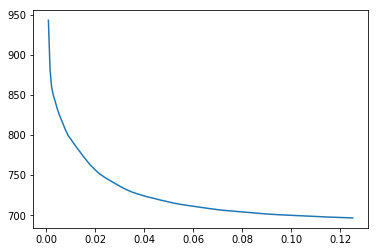

In [355]:
# for p, t in zip(preds, yte):
#     print(p, ", ", t)
plt.plot(times, objs)

# plot generation

In [361]:
_, _, _, sgd_objs, sgd_times = fit_sgd(X, y, 0, 1000)
_, _, objs, times = fit(X, y, 0, 1000)
_, _, minibatch_objs, minibatch_times = fit_minibatch(X, y, 0, 1000, batch_size=300)

kern matrix created


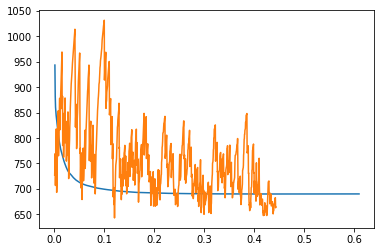

In [372]:
n = 1000
plt.plot(times[:n], objs[:n])
plt.plot(sgd_times[:n], sgd_objs[:n])
# plt.plot(minibatch_times[:n], minibatch_objs[:n])

In [344]:
_, _, minibatch_objs = fit_minibatch(X, y, 0, 2000, batch_size=300)

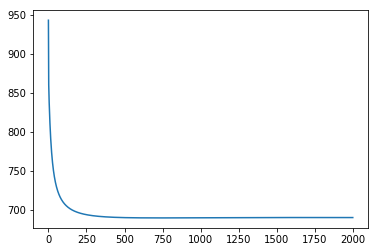

In [346]:
plt.plot(objs)

# end 3

### Stochastic Gradient Descent

In [357]:
def fit_sgd(X, y, lamb, n_epochs, gamma=1, epsilon=0.01, kern="gaus"):
    n = X.shape[0]
    if kern == "gaus":
        s = get_sigma(X)
        k = give_gaus_kern(s)
        
    elif kern == "lin":
        k = lin_kern

    K = create_kernel_matrix(k, X)
    
    print("kern matrix created")
#     gamma = get_step_size(K, lamb)
#     gamma = 0.1
    
    # gradient descent
    c = np.zeros(n)
    Kc = np.dot(K, c)
    objs = np.zeros(n_epochs)
    
    times = np.zeros(n_epochs)
    start = time.time()
    for epoch in range(n_epochs):
        i = random.randint(0,n-1)
        Kc_i_old = K[:,i]*c[i]
        c[i] = c[i] + gamma*(y[i] - sigmoid_array(Kc[i]) + 2*lamb*c[i])
        Kc = Kc - Kc_i_old + K[:,i]*c[i]
        
        objs[epoch] = -sum(np.log(sigmoid_array(np.multiply(y, np.dot(K,c)))))
        times[epoch] = time.time() - start
            
    def predictor(x):
        s = 0
        for i in range(n):
            s += k(X[i],x)*c[i]

        return 1.0 / (1 + np.e**(-s))
    
    return predictor, gamma, c, objs, times


In [315]:
# s = get_sigma(X)
# K = create_kernel_matrix(give_gaus_kern(s), X)

In [316]:
%%time
pred, gamma, c, objs = fit_sgd(X, y, 0, 2000)

kern matrix created
CPU times: user 9.59 s, sys: 148 ms, total: 9.74 s
Wall time: 9.56 s


In [317]:
score, preds = evaluate(Xte, yte, pred)
score

0.93600000000000005

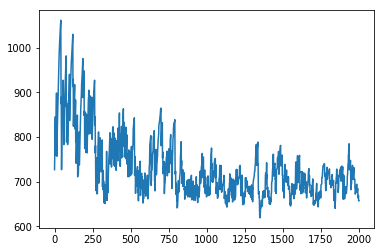

In [319]:
plt.plot(objs)

In [153]:
def fit_sgd_with_kern(X, y, K, lamb, n_epochs, kern="gaus"):
    n = X.shape[0]
    if kern == "gaus":
        s = get_sigma(X)
        k = give_gaus_kern(s)
        
    elif kern == "lin":
        k = lin_kern

#     K = create_kernel_matrix(k, X)
    
    gamma = get_step_size(K, lamb)
    
    # gradient descent
    c = np.zeros(n)
    Kc = np.zeros(n)  #np.dot(K, c)
    for epoch in range(n_epochs):
        i = random.randint(0,n-1)
        Kc_i_old = K[:,i]*c[i]
        c[i] = c[i] + gamma*(y[i] - sigmoid_array(Kc[i]) + 2*lamb*c[i])
        Kc = Kc - Kc_i_old + K[:,i]*c[i]
        
            
    def predictor(x):
        s = 0
        for i in range(n):
            s += k(X[i],x)*c[i]

        prob = 1.0 / (1 + np.e**(-s))
        return 1.0 / (1 + np.e**(-s))
    
    return predictor, gamma, c
